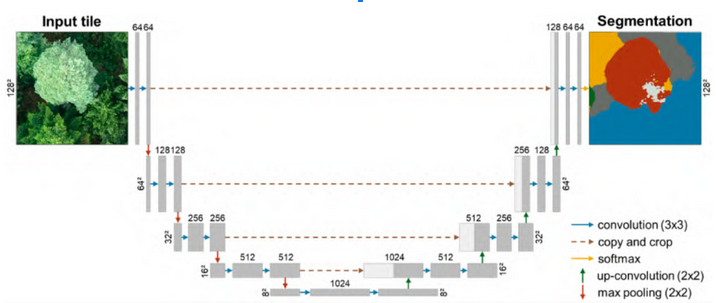

In [ ]:
# Import des modules Python nécessaires
import os
from PIL import Image
import cv2
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
# # Data
# # ??
# X = np.array(Image.open("./Data/train-Z2t3_.tif"))
# y = np.array(Image.open("./Data/target-train-Z2t3_.tif"))

In [ ]:
# X.shape

In [ ]:
# X = X.reshape(1, 6669, 5485, 3)
# X.shape

In [ ]:
# y = to_categorical(y)

In [ ]:
# y = y.reshape(1, 6669, 5485, 3)
# y.shape

In [ ]:
# savedir = "./Cropped"
# filename = "./Data/test-Z2t3_.tif"
# img = Image.open(filename)
# width, height = img.size

# start_pos = start_x, start_y = (0, 0)
# cropped_image_size = w, h = (128, 128)

# frame_num = 1
# for col_i in range(0, width, w):
#     for row_i in range(0, height, h):
#         crop = img.crop((col_i, row_i, col_i + w, row_i + h))
#         save_to= os.path.join(savedir, "counter_{:03}.jpg")
#         crop.save(save_to.format(frame_num))
#         frame_num += 1

def crop_images(savedir, filename, save_name):
    img = Image.open(filename)
    width, height = img.size
    w, h = (128, 128)

    frame_num = 1
    for col_i in range(0, width, w):
        for row_i in range(0, height, h):
            crop = img.crop((col_i, row_i, col_i + w, row_i + h))
            save_to = os.path.join(savedir, save_name + "_{:03}.jpg")
            crop.save(save_to.format(frame_num))
            frame_num += 1


crop_images("./Cropped/test", "./Data/test-Z2t3_.tif", "test")
crop_images("./Cropped/train", "./Data/train-Z2t3_.tif", "train")
crop_images("./Cropped/target-test", "./Data/target-test-Z2t3_.tif", "target-test")
crop_images("./Cropped/target-train", "./Data/target-train-Z2t3_.tif", "target-train")

In [ ]:
files_test = glob.glob("./Cropped/test/*.jpg")
files_test.sort()
files_train = glob.glob("./Cropped/train/*.jpg")
files_train.sort()
files_tar_test = glob.glob("./Cropped/target-test/*.jpg")
files_tar_test.sort()
files_tar_train = glob.glob("./Cropped/target-train/*.jpg")
files_tar_train.sort()

In [ ]:
files_test[:10]

In [ ]:
# X = np.array(Image.open("./Data/train-Z2t3_.tif"))
# y = np.array(Image.open("./Data/target-train-Z2t3_.tif"))

In [ ]:
X = []
for myFile in files_test:
    image = cv2.imread(myFile)
    X.append(image)
    
X = np.array(X)
print('X:', X.shape)

In [ ]:
y = []
for myFile in files_tar_test:
    image = cv2.imread(myFile)
    y.append(image)

y = np.array(y)
print('y:', y.shape)

In [ ]:
# y = y[:, :, :, 0].reshape((510, 128, 128, 1))

In [ ]:
y.shape

In [ ]:
# Construction d'un RNA convolutif
CNN = Sequential([Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
                  Conv2D(64, (3, 3), padding='same', activation='relu'),
                  MaxPooling2D((2, 2)),
                  Conv2D(128, (3, 3), padding='same', activation='relu'),
                  Conv2D(128, (3, 3), padding='same', activation='relu'),
                  MaxPooling2D((2, 2)),
                  Conv2D(256, (3, 3), padding='same', activation='relu'),
                  Conv2D(256, (3, 3), padding='same', activation='relu'),
                  MaxPooling2D((2, 2)),
                  Conv2D(512, (3, 3), padding='same', activation='relu'),
                  Conv2D(512, (3, 3), padding='same', activation='relu'),
                  MaxPooling2D((2, 2)),
                  Conv2D(1024, (3, 3), padding='same', activation='relu'),
                  UpSampling2D(size=(2, 2)),
                  Conv2D(512, (3, 3), padding='same', activation='relu'),
                  Conv2D(512, (3, 3), padding='same', activation='relu'),
                  UpSampling2D(size=(2, 2)),
                  Conv2D(256, (3, 3), padding='same', activation='relu'),
                  Conv2D(256, (3, 3), padding='same', activation='relu'),
                  UpSampling2D(size=(2, 2)),
                  Conv2D(128, (3, 3), padding='same', activation='relu'),
                  Conv2D(128, (3, 3), padding='same', activation='relu'),
                  UpSampling2D(size=(2, 2)),
                  Conv2D(64, (3, 3), padding='same', activation='relu'),
                  Conv2D(64, (3, 3), padding='same', activation='relu'),
                  Conv2D(3, (1, 1), activation='softmax')])
CNN.summary()

In [ ]:
CNN.compile(optimizer='rmsprop', 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

In [ ]:
history_CNN = CNN.fit(X,
                      y,
                      verbose=True,
                      epochs=20)